# 1. Create a Suitable dataset

* For Creating a Suitable dataset we use `sklearn` to load the dataset using `make_classification` library name
* Another method there also would be having Two another method to load the dataset
    1. Load the dataset using `Seaborn` by using this python code **`sns.load_datset('datasetname')`** etc..
    2. Load the dataset using URl or kaggle dataset by using this python code `pd.read_csv('datasetname')` or `url=https://www.kaggle.dataset.datasetname.com` and `df = pd.read_url('url')` etc...

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

# Set random seed for reproducibility
np.random.seed(42)

# Create a synthetic dataset with meaningful distributions
def create_4d_dataset(n_samples=1000):
    # Generate 3D spatial coordinates with different distributions
    x = np.random.normal(0, 2, n_samples)  # Normal distribution
    y = np.random.exponential(1.5, n_samples)  # Exponential distribution
    z = np.random.uniform(-5, 5, n_samples)  # Uniform distribution
    
    # Create 4th dimension based on a function of x, y, z with some noise
    # This creates meaningful patterns in the data
    fourth_dim = (x**2 + y**2 + z**2) * 0.5 + np.random.normal(0, 1, n_samples)
    
    # Create some clusters for better visualization
    cluster_effect = np.sin(x) * np.cos(y) * np.tanh(z)
    fourth_dim += cluster_effect * 2
    
    # Scale the fourth dimension to a nice range
    fourth_dim = MinMaxScaler(feature_range=(1, 100)).fit_transform(fourth_dim.reshape(-1, 1)).flatten()
    
    # Create a DataFrame
    df = pd.DataFrame({
        'x': x,
        'y': y, 
        'z': z,
        'value': fourth_dim,  # 4th dimension (color/size)
        'cluster': (x > 0).astype(int) + (y > 2).astype(int) * 2  # For additional grouping
    })
    
    return df

# Generate the dataset
dataset = create_4d_dataset(1000)
print("Dataset shape:", dataset.shape)
print("\nDataset statistics:")
print(dataset.describe())

Dataset shape: (1000, 5)

Dataset statistics:
                 x            y            z        value      cluster
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.038664     1.511979    -0.055050    15.814433     1.030000
std       1.958432     1.504483     2.889197    10.467931     1.038354
min      -6.482535     0.004835    -4.999884     1.000000     0.000000
25%      -1.295181     0.425932    -2.434765     8.325413     0.000000
50%       0.050601     1.088897    -0.082894    14.087520     1.000000
75%       1.295888     2.057526     2.386289    20.558772     2.000000
max       7.705463    11.162584     4.978209   100.000000     3.000000


# 2. 4D Visualization using Matplotlib (3D + Color)

*  By creating a 4D visualizatiob plot using matplotlib the dataset are mustly is in this form :- 3 columns 3D for 3D space and 1 columns for 4TH dimension. Because range of value and destribution are important to create a 4D plot for visulization to make it attractive and 4D form
    - Convert your dataset in to two differnet variables `x` and `y` for X assign **three (3) columns** for 3D space and for y assign **one (1) column** for 4D dimension.
        1. Main requirements 4TH Dimension are mustly be a unique value
        2. Dataset are mustly is in good condition like there would be having no `Missing value`

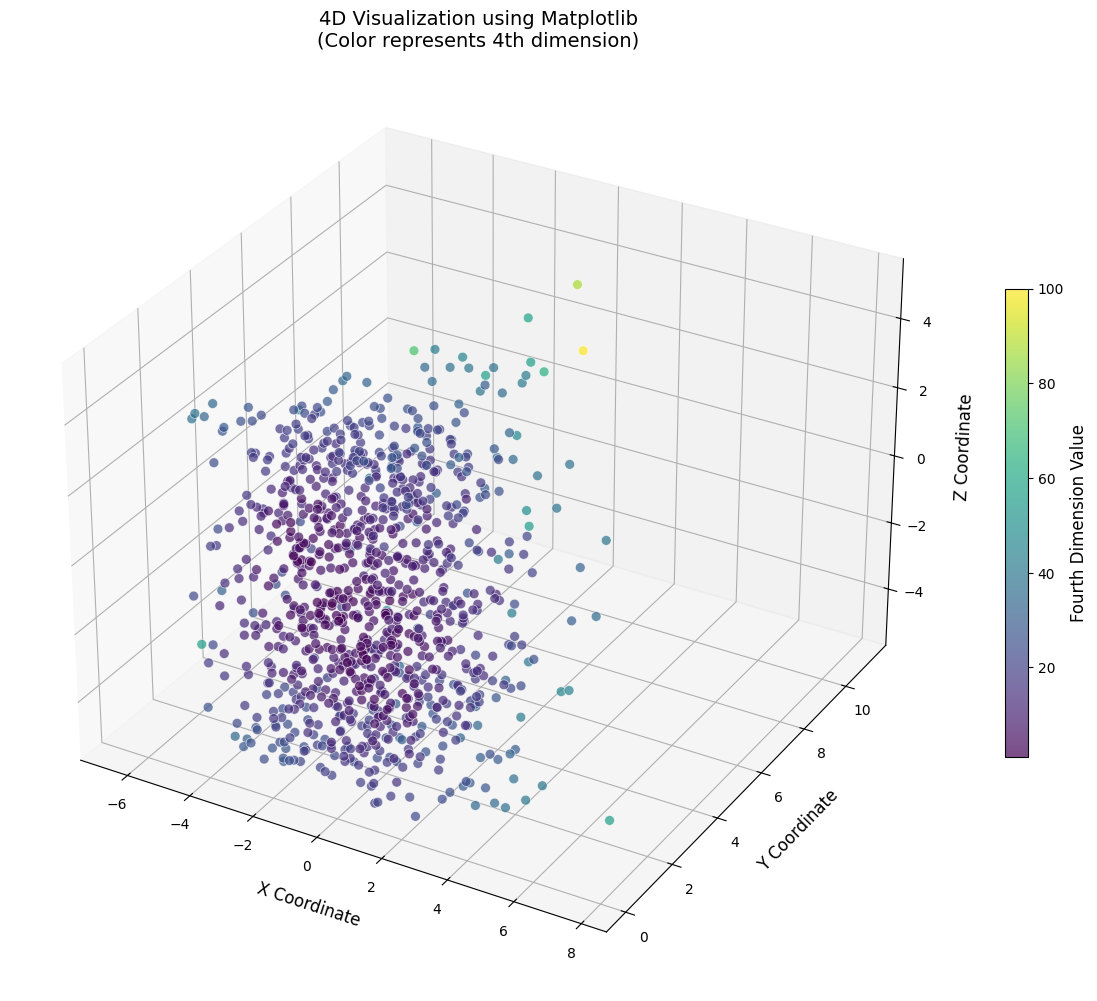

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_4d_matplotlib(df):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot with color as 4th dimension
    scatter = ax.scatter(df['x'], df['y'], df['z'], 
                        c=df['value'], 
                        cmap='viridis',
                        s=50,  # Size of points
                        alpha=0.7,
                        edgecolors='w',
                        linewidth=0.5)
    
    # Add colorbar
    cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=20)
    cbar.set_label('Fourth Dimension Value', fontsize=12)
    
    # Set labels and title
    ax.set_xlabel('X Coordinate', fontsize=12, labelpad=10)
    ax.set_ylabel('Y Coordinate', fontsize=12, labelpad=10)
    ax.set_zlabel('Z Coordinate', fontsize=12, labelpad=10)
    ax.set_title('4D Visualization using Matplotlib\n(Color represents 4th dimension)', fontsize=14)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot using matplotlib
plot_4d_matplotlib(dataset)

# 3. 4D Visualization using Plotly (Interactive)


In [8]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_4d_plotly(df):
    fig = go.Figure()
    
    # Create 3D scatter plot with color as 4th dimension
    fig.add_trace(go.Scatter3d(
        x=df['x'],
        y=df['y'],
        z=df['z'],
        mode='markers',
        marker=dict(
            size=6,
            color=df['value'],
            colorscale='Viridis',
            colorbar=dict(title='4th Dimension'),
            opacity=0.8,
            showscale=True
        ),
        text=[f'Value: {v:.2f}<br>X: {x:.2f}<br>Y: {y:.2f}<br>Z: {z:.2f}' 
              for v, x, y, z in zip(df['value'], df['x'], df['y'], df['z'])],
        hoverinfo='text',
        name='4D Data Points'
    ))
    
    # Update layout
    fig.update_layout(
        title='Interactive 4D Visualization using Plotly',
        scene=dict(
            xaxis_title='X Coordinate',
            yaxis_title='Y Coordinate',
            zaxis_title='Z Coordinate',
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
        ),
        width=800,
        height=600,
        margin=dict(l=0, r=0, b=0, t=40)
    )
    
    fig.show()

# Plot using plotly
plot_4d_plotly(dataset)

# 4. Advanced 4D plot with Multiple Dimensions


In [10]:
def advanced_4d_visualization(df):
    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
               [{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
        subplot_titles=('Color as 4th Dimension', 'Size as 4th Dimension',
                       'Color + Size as 4th Dimension', 'Cluster View')
    )
    
    # Plot 1: Color as 4th dimension
    fig.add_trace(go.Scatter3d(
        x=df['x'], y=df['y'], z=df['z'],
        mode='markers',
        marker=dict(
            color=df['value'],
            colorscale='Viridis',
            size=6,
            opacity=0.7,
            colorbar=dict(x=0.45, y=0.5, title='Value')
        ),
        name='Color Dimension'
    ), row=1, col=1)
    
    # Plot 2: Size as 4th dimension
    fig.add_trace(go.Scatter3d(
        x=df['x'], y=df['y'], z=df['z'],
        mode='markers',
        marker=dict(
            size=df['value']/10,  # Scale size appropriately
            color='blue',
            opacity=0.7,
            sizemode='diameter'
        ),
        name='Size Dimension'
    ), row=1, col=2)
    
    # Plot 3: Both color and size as 4th dimension
    fig.add_trace(go.Scatter3d(
        x=df['x'], y=df['y'], z=df['z'],
        mode='markers',
        marker=dict(
            size=df['value']/10,
            color=df['value'],
            colorscale='Plasma',
            opacity=0.7,
            colorbar=dict(x=1.0, y=0.5, title='Value'),
            sizemode='diameter'
        ),
        name='Color + Size'
    ), row=2, col=1)
    
    # Plot 4: Cluster view - FIXED: Using a valid Plotly colorscale
    fig.add_trace(go.Scatter3d(
        x=df['x'], y=df['y'], z=df['z'],
        mode='markers',
        marker=dict(
            size=6,
            color=df['cluster'],
            colorscale='Portland',  # Changed from 'Set1' to valid Plotly colorscale
            opacity=0.7,
            colorbar=dict(x=1.0, y=0.1, title='Cluster')
        ),
        name='Clusters'
    ), row=2, col=2)
    
    # Update layout
    fig.update_layout(
        title_text="Advanced 4D Visualizations",
        height=1000,
        width=1200,
        showlegend=False
    )
    
    # Update scene properties for each subplot with proper scene references
    scene_config = dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate', 
        zaxis_title='Z Coordinate'
    )
    
    fig.update_scenes(scene_config, row=1, col=1)
    fig.update_scenes(scene_config, row=1, col=2)
    fig.update_scenes(scene_config, row=2, col=1)
    fig.update_scenes(scene_config, row=2, col=2)
    
    fig.show()

# Create advanced visualization
advanced_4d_visualization(dataset)

In [11]:
def advanced_4d_visualization_fixed(df):
    # Create a custom discrete color scale for clusters (similar to Set1)
    cluster_colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
               [{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
        subplot_titles=('Color as 4th Dimension', 'Size as 4th Dimension',
                       'Color + Size as 4th Dimension', 'Cluster View')
    )
    
    # Plot 1: Color as 4th dimension
    fig.add_trace(go.Scatter3d(
        x=df['x'], y=df['y'], z=df['z'],
        mode='markers',
        marker=dict(
            color=df['value'],
            colorscale='Viridis',
            size=6,
            opacity=0.7,
            colorbar=dict(x=0.45, y=0.5, title='Value')
        ),
        name='Color Dimension'
    ), row=1, col=1)
    
    # Plot 2: Size as 4th dimension
    fig.add_trace(go.Scatter3d(
        x=df['x'], y=df['y'], z=df['z'],
        mode='markers',
        marker=dict(
            size=df['value']/10,
            color='blue',
            opacity=0.7,
            sizemode='diameter'
        ),
        name='Size Dimension'
    ), row=1, col=2)
    
    # Plot 3: Both color and size as 4th dimension
    fig.add_trace(go.Scatter3d(
        x=df['x'], y=df['y'], z=df['z'],
        mode='markers',
        marker=dict(
            size=df['value']/10,
            color=df['value'],
            colorscale='Plasma',
            opacity=0.7,
            colorbar=dict(x=1.0, y=0.5, title='Value'),
            sizemode='diameter'
        ),
        name='Color + Size'
    ), row=2, col=1)
    
    # Plot 4: Cluster view with custom discrete colors
    # For discrete colors, we need to map cluster values to colors
    cluster_colors_mapped = [cluster_colors[i % len(cluster_colors)] for i in df['cluster']]
    
    fig.add_trace(go.Scatter3d(
        x=df['x'], y=df['y'], z=df['z'],
        mode='markers',
        marker=dict(
            size=6,
            color=cluster_colors_mapped,  # Use pre-mapped colors
            opacity=0.7
        ),
        name='Clusters'
    ), row=2, col=2)
    
    # Update layout
    fig.update_layout(
        title_text="Advanced 4D Visualizations",
        height=1000,
        width=1200,
        showlegend=False
    )
    
    # Update scene properties
    scene_config = dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate'
    )
    
    fig.update_scenes(scene_config, row=1, col=1)
    fig.update_scenes(scene_config, row=1, col=2) 
    fig.update_scenes(scene_config, row=2, col=1)
    fig.update_scenes(scene_config, row=2, col=2)
    
    fig.show()

# Create advanced visualization with custom colors
advanced_4d_visualization_fixed(dataset)

# 4.5 piechart & donut plot


In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Create a function for pie + donut combination plot
def create_pie_donut_combo(df):
    # First, let's prepare the data for visualization
    # Cluster distribution for pie chart
    cluster_counts = df['cluster'].value_counts().sort_index()
    cluster_labels = [f'Cluster {i}' for i in cluster_counts.index]
    
    # Value ranges for donut chart (4th dimension distribution)
    value_bins = pd.cut(df['value'], bins=5, labels=[
        'Very Low', 'Low', 'Medium', 'High', 'Very High'
    ])
    value_counts = value_bins.value_counts().sort_index()
    
    # Create subplots with 1 row and 2 columns
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{'type': 'domain'}, {'type': 'domain'}]],
        subplot_titles=(
            '📊 Cluster Distribution (Pie Chart)',
            '🎯 Value Ranges Distribution (Donut Chart)'
        )
    )
    
    # Pie Chart - Cluster Distribution
    fig.add_trace(go.Pie(
        labels=cluster_labels,
        values=cluster_counts.values,
        name="Clusters",
        marker=dict(colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9A826']),
        hole=0.4,  # This makes it a donut, set to 0 for regular pie
        textinfo='percent+label',
        textposition='inside',
        insidetextorientation='radial'
    ), 1, 1)
    
    # Donut Chart - Value Ranges Distribution
    fig.add_trace(go.Pie(
        labels=value_counts.index.tolist(),
        values=value_counts.values,
        name="Value Ranges",
        marker=dict(colors=['#FFEAA7', '#FDCB6E', '#E17055', '#D63031', '#B2BEC3']),
        hole=0.6,  # Larger hole for donut effect
        textinfo='percent+label',
        textposition='outside',
        pull=[0.1, 0, 0, 0, 0]  # Pull first slice slightly
    ), 1, 2)
    
    # Update layout for beautiful styling
    fig.update_layout(
        title_text="🍩 Pie Chart & Donut Plot Combination<br>"
                  "<sup>Dataset Analysis Visualization</sup>",
        title_x=0.5,
        title_font=dict(size=24, color='#2D3436'),
        height=600,
        width=1000,
        showlegend=True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.2,
            xanchor="center",
            x=0.5
        ),
        annotations=[
            dict(
                text='            Clusters',
                x=0.18, y=0.5,
                font=dict(size=16, color='#2D3436'),
                showarrow=False
            ),
            dict(
                text='Value Ranges          ',
                x=0.82, y=0.5,
                font=dict(size=16, color='#2D3436'),
                showarrow=False
            )
        ]
    )
    
    # Update traces for better styling
    fig.update_traces(
        hoverinfo='label+percent+value',
        textfont=dict(size=12),
        marker=dict(line=dict(color='#FFFFFF', width=2))
    )
    
    return fig

# Create and show the combination plot
combo_fig = create_pie_donut_combo(dataset)
combo_fig.show()

### Alternative single piechart

In [21]:
def create_nested_pie_donut(df):
    # Prepare data
    cluster_counts = df['cluster'].value_counts().sort_index()
    value_bins = pd.cut(df['value'], bins=4)
    value_counts = value_bins.value_counts().sort_index()
    
    # Create the nested chart
    fig = go.Figure()
    
    # Outer donut (Value ranges)
    fig.add_trace(go.Pie(
        values=value_counts.values,
        labels=value_counts.index.astype(str),
        name="Value Ranges",
        domain=dict(x=[0, 1], y=[0, 1]),
        hole=0.5,
        marker=dict(colors=['#74B9FF', '#6C5CE7', '#FD79A8', '#00B894']),
        textinfo='label+percent',
        textposition='inside',
        insidetextorientation='radial'
    ))
    
    # Inner pie (Clusters)
    fig.add_trace(go.Pie(
        values=cluster_counts.values,
        labels=[f'Cluster {i}' for i in cluster_counts.index],
        name="Clusters",
        domain=dict(x=[0.2, 0.8], y=[0.2, 0.8]),
        hole=0.7,
        marker=dict(colors=['#FFEAA7', '#FDCB6E', '#E17055']),
        textinfo='label+percent',
        textposition='inside'
    ))
    
    # Update layout
    fig.update_layout(
        title_text="🎯 Nested Pie & Donut Combination<br>"
                  "<sup>Inner: Clusters | Outer: Value Ranges</sup>",
        title_x=0.5,
        title_font=dict(size=20),
        height=700,
        width=800,
        showlegend=True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.1,
            xanchor="center",
            x=0.5
        ),
        annotations=[
            dict(
                text='Value Ranges',
                x=0.5, y=0.5,
                font=dict(size=14, color='#2D3436'),
                showarrow=False
            )
        ]
    )
    
    return fig

# Create nested chart
nested_fig = create_nested_pie_donut(dataset)
nested_fig.show()

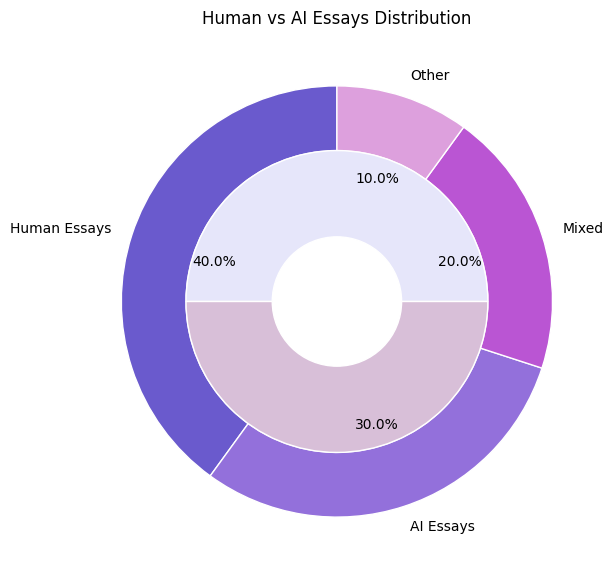

In [23]:
import matplotlib.pyplot as plt

# Sample data
sizes = [40, 30, 20, 10]
labels = ["Human Essays", "AI Essays", "Mixed", "Other"]
colors = ["#6A5ACD", "#9370DB", "#BA55D3", "#DDA0DD"]

# Outer pie (normal pie chart)
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', startangle=90,
    wedgeprops=dict(width=0.3, edgecolor="white")
)

# Inner pie (donut center chart)
inner_sizes = [50, 50]
inner_colors = ["#E6E6FA", "#D8BFD8"]
ax.pie(
    inner_sizes, radius=0.7, colors=inner_colors,
    wedgeprops=dict(width=0.4, edgecolor="white")
)

# Equal aspect ratio ensures pie is drawn as a circle.
ax.set(aspect="equal", title="Human vs AI Essays Distribution")
plt.show()


### 3D chart version

In [22]:
def create_3d_pie_donut_combo(df):
    # Prepare data
    cluster_counts = df['cluster'].value_counts().sort_index()
    value_bins = pd.cut(df['value'], bins=4)
    value_counts = value_bins.value_counts().sort_index()
    
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{'type': 'domain'}, {'type': 'domain'}]],
        subplot_titles=('3D Pie Chart - Clusters', '3D Donut - Value Ranges')
    )
    
    # 3D Pie Chart
    fig.add_trace(go.Pie(
        labels=[f'Cluster {i}' for i in cluster_counts.index],
        values=cluster_counts.values,
        name="Clusters",
        marker=dict(colors=['#FF6B6B', '#4ECDC4', '#45B7D1']),
        hole=0.3,
        pull=[0.1, 0, 0],  # 3D effect
        rotation=45  # Rotation for 3D effect
    ), 1, 1)
    
    # 3D Donut Chart
    fig.add_trace(go.Pie(
        labels=value_counts.index.astype(str),
        values=value_counts.values,
        name="Value Ranges",
        marker=dict(colors=['#74B9FF', '#6C5CE7', '#FD79A8', '#00B894']),
        hole=0.6,
        pull=[0.05, 0.02, 0.02, 0.02],
        rotation=30
    ), 1, 2)
    
    # Update layout
    fig.update_layout(
        title_text="🎪 3D Pie & Donut Combination",
        title_x=0.5,
        height=600,
        width=900,
        showlegend=True
    )
    
    # Add 3D effect through annotations
    fig.add_annotation(
        x=0.25, y=0.1,
        text="↻ 3D Rotation Effect",
        showarrow=False,
        font=dict(size=10, color="gray")
    )
    
    return fig

# Create 3D version
pie_3d_fig = create_3d_pie_donut_combo(dataset)
pie_3d_fig.show()

# 5. Additional Analysis and Statistics


In [9]:
# Let's analyze the dataset distribution
print("=== Dataset Distribution Analysis ===")
print(f"X range: [{dataset['x'].min():.2f}, {dataset['x'].max():.2f}]")
print(f"Y range: [{dataset['y'].min():.2f}, {dataset['y'].max():.2f}]")
print(f"Z range: [{dataset['z'].min():.2f}, {dataset['z'].max():.2f}]")
print(f"4th Dimension range: [{dataset['value'].min():.2f}, {dataset['value'].max():.2f}]")

# Correlation analysis
correlation_matrix = dataset[['x', 'y', 'z', 'value']].corr()
print("\n=== Correlation Matrix ===")
print(correlation_matrix)

# Save dataset for future use
dataset.to_csv('4d_dataset.csv', index=False)
print("\nDataset saved as '4d_dataset.csv'")

=== Dataset Distribution Analysis ===
X range: [-6.48, 7.71]
Y range: [0.00, 11.16]
Z range: [-5.00, 4.98]
4th Dimension range: [1.00, 100.00]

=== Correlation Matrix ===
              x         y         z     value
x      1.000000 -0.008813  0.004823  0.010336
y     -0.008813  1.000000  0.021716  0.643251
z      0.004823  0.021716  1.000000 -0.020442
value  0.010336  0.643251 -0.020442  1.000000

Dataset saved as '4d_dataset.csv'


### Key Features of this Implementation:
1. **Meaningful Dataset:** Created with different distributions (normal, exponential, uniform) for better visualization

2. **Pattern Creation:** The 4th dimension is mathematically related to the spatial coordinates

3. **Multiple Visualization Techniques:**

    - Color mapping (Matplotlib & Plotly)
    - Size mapping
    - Interactive 3D plots
    - Multiple viewing angles

4. **Proper Scaling:** Values are scaled appropriately for good visualization

5. **Statistical Analysis:** Includes correlation and distribution analysis

#### **Requirements:**

```bash
pip install numpy pandas matplotlib plotly scikit-learn seaborn